In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

In [34]:
# Подгружаем датасет на другие даты и прогноз по нему 

forecast = pd.read_csv('../result.csv')
in_df = pd.read_csv('../data/secret.csv')

In [35]:
grouped = in_df.groupby(in_df.date)['target'].sum()
print(forecast[['date','predict']])
grouped

          date  predict
0   2023-07-02  9441.55
1   2023-07-03  9538.39
2   2023-07-04  9161.41
3   2023-07-05  9416.84
4   2023-07-06  9525.27
5   2023-07-07  9589.56
6   2023-07-08  9629.52
7   2023-07-09  9558.07
8   2023-07-10  9522.23
9   2023-07-11  9631.68
10  2023-07-12  9384.17
11  2023-07-13  9599.92
12  2023-07-14  9437.06
13  2023-07-15  9784.01
14  2023-07-16  9703.55
15  2023-07-17  9358.33
16  2023-07-18  9389.57
17  2023-07-19  9696.23
18  2023-07-20  9813.91
19  2023-07-21  9487.21
20  2023-07-22  9365.56
21  2023-07-23  9589.38
22  2023-07-24  9274.69
23  2023-07-25  9270.74
24  2023-07-26  9663.62
25  2023-07-27  9492.66
26  2023-07-28  9713.32
27  2023-07-29  9411.56
28  2023-07-30  9533.82
29  2023-07-31  9572.56


date
2023-07-02    8998.129
2023-07-03    9346.817
2023-07-04    9458.920
2023-07-05    9600.324
2023-07-06    9662.962
2023-07-07    9586.395
2023-07-08    9203.356
2023-07-09    9165.339
2023-07-10    9666.106
2023-07-11    9737.230
2023-07-12    9895.046
2023-07-13    9803.034
2023-07-14    9675.683
2023-07-15    9384.608
2023-07-16    9361.742
2023-07-17    9886.099
2023-07-18    9565.814
2023-07-19    9611.003
2023-07-20    9621.374
2023-07-21    9663.067
2023-07-22    9373.196
2023-07-23    9209.273
2023-07-24    9676.462
2023-07-25    9821.607
2023-07-26    9692.021
2023-07-27    9676.911
2023-07-28    9754.812
2023-07-29    9525.396
2023-07-30    9296.344
2023-07-31    9732.440
Name: target, dtype: float64

In [36]:
# Сгруппируем фактические значения для сравнения
target_fact = grouped

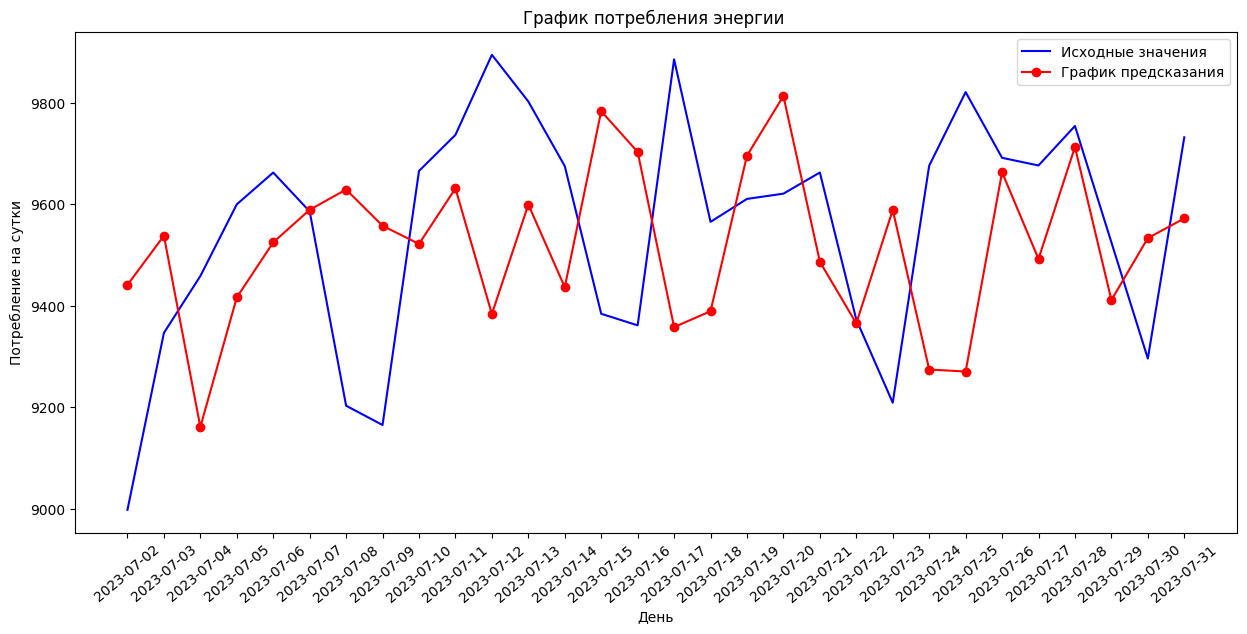

In [37]:
# Предсказанные значения
predicted = forecast['predict']
# Ваши временные индексы (например, временные метки)
X_axis = forecast['date'] 
# Создаем график
plt.figure(figsize=(15, 6.5))
plt.plot(X_axis, target_fact, label='Исходные значения', color='b')
plt.plot(X_axis, predicted, label='График предсказания', color='r', marker='o')
plt.xlabel('День')
plt.xticks(rotation=40)
plt.ylabel("Потребление на сутки")
plt.legend()
plt.title('График потребления энергии ')
plt.show()

In [46]:
# MAPE (Mean Absolute Percentage Error)
def calculate_mape(y_true:pd.Series, y_pred:pd.Series):
    y_true = y_true.to_numpy(copy=True)
    y_pred = y_pred.to_numpy(copy=True)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAPE : {:.2f}%".format(calculate_mape(target_fact, predicted)))



MAPE : 2.55%


In [39]:
# Вычисление MAE
def show_mae(y1,y2):
    print("Mean Absolute Error (MAE):",mean_absolute_error(y1,y2))

show_mae(target_fact,predicted)


Mean Absolute Error (MAE): 242.7446666666666
